# CONTRIBUTION - CHEN Network Analysis 

##Packages

In [ ]:
# run once at the beginning

#Install latest version of matplotlib (matplotlib-3.5.2) (necessary for drawing graphs)
!pip install -U matplotlib

# restart the kernel
import os
os.kill(os.getpid(), 9)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 26.9 MB/s 
     |████████████████████████████████| 944 kB 48.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import random
import seaborn as sns
import networkx.algorithms.community as nx_comm
from matplotlib.lines import Line2D
from textwrap import wrap
from numpy import inf

sns.set_style('whitegrid')

In [ ]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.2


## Dataset import

In [ ]:
### convert from txt to csv and upload to github

# chen_edges = pd.read_csv('chen_edges.txt', sep=",", header=None)
# chen_edges.columns = ["source", "target"]
# chen_edges["target"] = chen_edges["target"].astype(int)
# chen_edges.to_csv("chen_edges.csv", sep=',', encoding='cp1251', index=False)

# chen_info = pd.read_csv('chen_info.txt', sep=" ", header=None)
# chen_info.columns = ["source", "citation_number", "h-index", "g-index", "academic_title", "computer_science_author", "biology_author", "sociology_author"]
# chen_info.to_csv("chen_info.csv", sep=',', encoding='cp1251', index=False)

#Dataset Edges (Chen) from GitHub
url = 'https://github.com/jane1357z/network_files/blob/8a395d6c5761d55a2c4a295c99317a6fe0ad0b6f/chen_edges.csv?raw=true'
df_chen_edges = pd.read_csv(url, sep=',', header=0, engine='python')

#Dataset Info (Chen) from GitHub
url = 'https://github.com/jane1357z/network_files/blob/8a395d6c5761d55a2c4a295c99317a6fe0ad0b6f/chen_info.csv?raw=true'
df_chen_info = pd.read_csv(url, sep=',', header=0, engine='python')

###  create separate dataset with author and field
# for j in range(len(df_chen_info)):
#     x = df_chen_info.loc[j][0]
#     if(df_chen_info.loc[j][5]==1 and df_chen_info.loc[j][6]==0 and df_chen_info.loc[j][7]==0):
#         field = "comp"
#     elif(df_chen_info.loc[j][5]==0 and df_chen_info.loc[j][6]==1 and df_chen_info.loc[j][7]==0):
#         field = "bio"
#     elif(df_chen_info.loc[j][5]==0 and df_chen_info.loc[j][6]==0 and df_chen_info.loc[j][7]==1):
#         field = "soc"
#     elif(df_chen_info.loc[j][5]==1 and df_chen_info.loc[j][6]==1 and df_chen_info.loc[j][7]==0):
#         field = "comp_bio"
#     elif(df_chen_info.loc[j][5]==1 and df_chen_info.loc[j][6]==0 and df_chen_info.loc[j][7]==1):
#         field = "comp_soc"
#     elif(df_chen_info.loc[j][5]==0 and df_chen_info.loc[j][6]==1 and df_chen_info.loc[j][7]==1):
#         field = "bio_soc"
#     elif(df_chen_info.loc[j][5]==1 and df_chen_info.loc[j][6]==1 and df_chen_info.loc[j][7]==1):
#         field = "comp_bio_soc"
#     elif(df_chen_info.loc[j][5]==0 and df_chen_info.loc[j][6]==0 and df_chen_info.loc[j][7]==0):
#         field = "other"
#     z = str(x)
#     author_field.append([z,field])
# df_author_fields = pd.DataFrame(author_field, columns=['author', 'field'])
# df_author_fields.to_csv("chen_author_fields_all.csv", sep=',', encoding='cp1251', index=False)

url = 'https://github.com/jane1357z/network_files/blob/0b48c37d09951696176be53cf90e2d176f4de3c0/chen_author_fields_all.csv?raw=true'
df_fields = pd.read_csv(url, sep=',', header=0, engine='python')

# Exploratory Data Analysis - Chen 🔍

In [ ]:
#Shape of object types of chen_edges
print(f"\n{df_chen_edges.info()}\n")

#Check for missing values 
edges_misval = df_chen_edges.isnull()
print(f"Missing values:\n{edges_misval.sum()}\n")

#Check for duplicated rows 
edges_duplicates = df_chen_edges.duplicated() 
print(f"Number of duplicated rows:\n{edges_duplicates.sum()}\n")

#Count number of unique authors
all_nodes = list(df_chen_edges["source"]) + list(df_chen_edges["target"])
edges_authors = set(all_nodes)
print(f"Number of unique authors:\n{len(edges_authors)}\n")

#Frequency of appearances per author
node_counts = pd.Series(all_nodes).value_counts()
print(f"Node counts:\n{node_counts.describe()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234019 entries, 0 to 1234018
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   source  1234019 non-null  int64
 1   target  1234019 non-null  int64
dtypes: int64(2)
memory usage: 18.8 MB

None

Missing values:
source    0
target    0
dtype: int64

Number of duplicated rows:
0

Number of unique authors:
277074

Node counts:
count    277074.000000
mean          8.907505
std          14.632754
min           1.000000
25%           2.000000
50%           4.000000
75%          10.000000
max         463.000000
dtype: float64



In [ ]:
#Summary statistics of numerical columns for chen_info
print(f"{df_chen_info.describe()}\n")

#Shape of object types in chen_info
print(f"{df_chen_info.info()}\n")

#Check for missing values
chen_info_misval = df_chen_info.isnull()
print(f"Missing values:\n{chen_info_misval.sum()}\n")

#Check for duplicated rows
chen_info_duplicates = df_chen_info.duplicated() 
print(f"Number of duplicated rows:\n{chen_info_duplicates.sum()}\n")

#Count number of unique authors
unique_authors_info = len(set(df_chen_info["source"]))
print(f"Number of unique authors: {unique_authors_info}\n")

#Distribution of fields
for field in df_chen_info.iloc[:,-3:]:
    authors_num = df_chen_info[field].sum()
    print(
        f"{field}: {authors_num} associated authors "
        f"({round(authors_num/unique_authors_info*100, 2)})%"
    )

              source  citation_number        h-index        g-index  \
count  402392.000000    402392.000000  402392.000000  402392.000000   
mean   201195.500000       868.190461       8.335007      16.670302   
std    116160.709097      3276.613239      10.756107      22.837558   
min         0.000000         0.000000       0.000000       0.000000   
25%    100597.750000        11.000000       2.000000       3.000000   
50%    201195.500000        92.000000       5.000000       9.000000   
75%    301793.250000       514.000000      11.000000      21.000000   
max    402391.000000    230238.000000     212.000000     477.000000   

       academic_title  computer_science_author  biology_author  \
count   402392.000000            402392.000000   402392.000000   
mean         0.785933                 0.206182        0.204679   
std          1.244125                 0.404563        0.403467   
min          0.000000                 0.000000        0.000000   
25%          0.000000         

# Chen Graph - Visualization ⛄

In [ ]:
n_cut = 300 # slicing dataset: number of rows to build the graphs

df_chen_authors = df_chen_edges.iloc[0:n_cut, :] # dataset used to build the graph

In [ ]:
### define the unique authors of the cut dataset and match them to the field
###  upload to github

# authors_list = []
# for el in df_chen_authors.source.unique():
#     authors_list.append(el)
# for el in df_chen_authors.target.unique():
#     authors_list.append(el)
# authors_list = list(set(authors_list))
# author_field = []
# for j in range(len(df_chen_info)):
#     x = df_chen_info.loc[j][0]
#     if x in authors_list:
#         if(df_chen_info.loc[j][5]==1 and df_chen_info.loc[j][6]==0 and df_chen_info.loc[j][7]==0):
#             field = "comp"
#         elif(df_chen_info.loc[j][5]==0 and df_chen_info.loc[j][6]==1 and df_chen_info.loc[j][7]==0):
#             field = "bio"
#         elif(df_chen_info.loc[j][5]==0 and df_chen_info.loc[j][6]==0 and df_chen_info.loc[j][7]==1):
#             field = "soc"
#         elif(df_chen_info.loc[j][5]==1 and df_chen_info.loc[j][6]==1 and df_chen_info.loc[j][7]==0):
#             field = "comp_bio"
#         elif(df_chen_info.loc[j][5]==1 and df_chen_info.loc[j][6]==0 and df_chen_info.loc[j][7]==1):
#             field = "comp_soc"
#         elif(df_chen_info.loc[j][5]==0 and df_chen_info.loc[j][6]==1 and df_chen_info.loc[j][7]==1):
#             field = "bio_soc"
#         elif(df_chen_info.loc[j][5]==1 and df_chen_info.loc[j][6]==1 and df_chen_info.loc[j][7]==1):
#             field = "comp_bio_soc"
#         elif(df_chen_info.loc[j][5]==0 and df_chen_info.loc[j][6]==0 and df_chen_info.loc[j][7]==0):
#             field = "other"
#         z = str(x)
#         author_field.append([z,field])
# df_author_fields = pd.DataFrame(author_field, columns=['author', 'field'])
# df_author_fields.to_csv("chen_author_fields_graph.csv", sep=',', encoding='cp1251', index=False)

### use the created datasets from github
url = 'https://github.com/jane1357z/network_files/blob/fd16f5ea896f5498dc3305e255d449e9061a32a8/chen_author_fields_graph.csv?raw=true'
df_chen_author_fields = pd.read_csv(url, sep=',', header=0, engine='python')

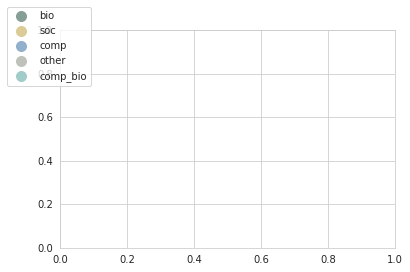

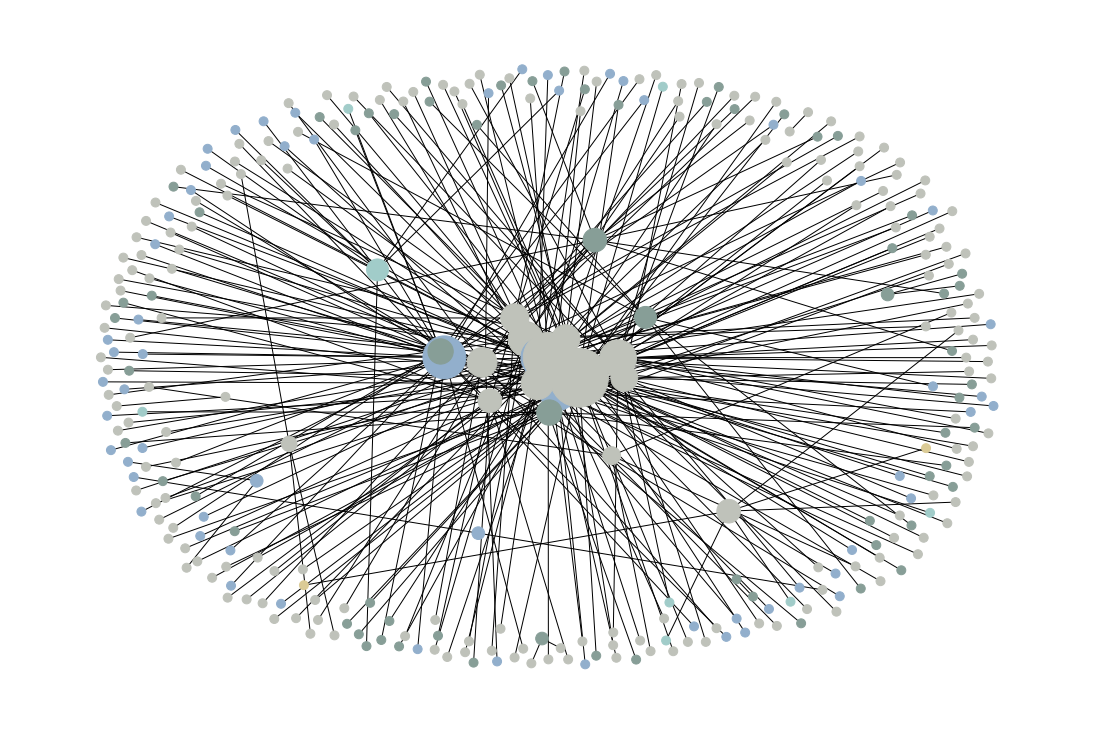

In [ ]:
# convert (r,g,b) to HEX
def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

# create list of fields
authors = df_chen_author_fields['author'].to_list()
fields_list = df_chen_author_fields['field'].to_list()
fields_list_unique = list(set(fields_list))

# set random colors
colors = []
for el in fields_list_unique:
    if el == "comp":
        colors.append(rgb2hex(146,175,204))
    elif el == "bio":
        colors.append(rgb2hex(135,158,151))
    elif el == "soc":
        colors.append(rgb2hex(219,203,150))
    elif el == "comp_bio":
        colors.append(rgb2hex(161,204,201))
    elif el == "comp_soc":
        colors.append(rgb2hex(177,153,174))
    elif el == "bio_soc":
        colors.append(rgb2hex(207,171,140))
    elif el == "comp_bio_soc":
        colors.append(rgb2hex(228,173,143))
    elif el == "other":
        colors.append(rgb2hex(191,194,186))

# define and fill the network
g_chen = nx.empty_graph(0, nx.DiGraph())
g_chen.graph['name'] = 'author'
columns = list(df_chen_authors.columns.values)
for i in range(len(columns)-1):
    g_chen.add_edges_from(zip(df_chen_authors[columns[i]], df_chen_authors[columns[i+1]]))

# match the field of interest with color to paint each node
graph_colors = []
for r,v in g_chen.nodes(data=True):
    ind_author = authors.index(r)
    field_name = fields_list[ind_author]
    ind_field = fields_list_unique.index(str(field_name))
    graph_colors.append(colors[ind_field])
        
# create the legend
l_ones = []
for i in range(len(fields_list_unique)):
    l_ones.append(1)
    fields_list_unique[i] = str(fields_list_unique[i])

legend_elements = []
for i in range(len(colors)):
    legend_elements.append(Line2D([0], [0], marker='o', color=colors[i], label=fields_list_unique[i], lw=0, markerfacecolor=colors[i], markersize=10))
ax = plt.gca()
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(-0.173,1.13))

# count degree to set the size of node
dg = g_chen.degree()
dg = np.array([dg[n] for n in g_chen.nodes])
plt.figure(clear=True,frameon=False, figsize=(15,10)) 
nx.draw(g_chen, with_labels=False, node_size=dg*80, arrows=False, node_color=graph_colors)

# plot the graph
plt.show()

# Network analysis 🎯

## Building Network

In [ ]:
#Full network and preliminary analysis
#Network subgraph built - undirected unweighted network of co-authors
g_full = nx.from_pandas_edgelist(df_chen_edges, source='source', target='target')

#Network preliminary analysis
print("Type :" , type(g_full))
print("Graph is directed:" , g_full.is_directed())
print("Egdes :" , g_full.number_of_edges()) 
print("Nodes :" , g_full.number_of_nodes()) 

Type : <class 'networkx.classes.graph.Graph'>
Graph is directed: False
Egdes : 1234019
Nodes : 277074


In [ ]:
#Network too large for metric calculations in GC

#Network subgraph - Dataframe
df_chen_pairs = df_chen_edges.iloc[0:50000, :]

#Network subgraph built - undirected unweighted network of co-authors
g = nx.from_pandas_edgelist(df_chen_pairs, source='source', target='target')

#Added attributes to nodes from both files (fields + only relevant attributes(info))
nodes_attr = df_fields.set_index('author').to_dict(orient = 'index')
nx.set_node_attributes(g, nodes_attr)

nodes_attr = df_chen_info[["source","citation_number","h-index"]].set_index('source').to_dict(orient = 'index')
nx.set_node_attributes(g, nodes_attr)

#Added node degree as attribute to node  
  #The node degree is the number of edges adjacent to the node. 
node_degree=dict(g.degree())
nx.set_node_attributes(g, node_degree, 'node_degree')

In [ ]:
#Check Attributes in nodes and
#Node with the largest node degree
max(dict(g.nodes).items(), key=lambda x: x[1]['node_degree'])

(455,
 {'citation_number': 116, 'field': 'bio', 'h-index': 4, 'node_degree': 158})

##Preliminary analysis of Network

In [ ]:
#Network preliminary analysis
print("Type :" , type(g))
print("Graph is directed:" , g.is_directed())
print("Egdes :" , g.number_of_edges()) 
print("Nodes :" , g.number_of_nodes()) 
print("K-core :" , nx.k_core(g, k=None, core_number=None))  #K-core of a unweighted network - is the maximal subgraph where all vertices have degree at least k

Type : <class 'networkx.classes.graph.Graph'>
Graph is directed: False
Egdes : 50000
Nodes : 44723
K-core : Graph with 156 nodes and 589 edges


#Network Metrics 🧮

###Finding Communities

In [ ]:
#Find communities in G using greedy modularity maximization 
g_communities = list(nx_comm.greedy_modularity_communities(g))

In [ ]:
#Add community to each node as an attribute
def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1
#using function
set_node_community(g, g_communities)

In [ ]:
#check community being added as attribute at a random node
list(g.nodes(data=True))[2]

(2,
 {'citation_number': 597,
  'community': 10,
  'field': 'other',
  'h-index': 9,
  'node_degree': 7})

####Size of Communities (number of authors) 



In [ ]:
#Total number of communities in network
print("Total number of communities in network:", len(g_communities))

Total number of communities in network: 2468


In [ ]:
#Number of authors within each community (Nodes and their community size)
def node_comm_size(communities):
    return [[list(x),len(x)] for x in communities]

#Run function to get nodes in a community and community size
ncs = node_comm_size(g_communities)

####Mean citation count of each Community

In [ ]:
#Extract community and citation number from network

#list of nodes and communities
comm = list(g.nodes(data =("community")))

#list of nodes and citations
cit = list(g.nodes(data =("citation_number")))

####Mean h-index of each Community

In [ ]:
#Extract citation number from network

#list of nodes and h-index
hindex = list(g.nodes(data =("h-index")))

#### Bivariate relationship between communities´ attributes 
- Graph PairGrid Pearson Coorelation

In [ ]:
#Extract all previous information of communities in Dataframe for correlation

#create dataframe with node community size (ncs) and explode by Nodes
comm_size_df = pd.DataFrame(ncs, columns=["Node","Community Size"]).explode('Node')

#Merged Dataframe of nodes, community and CITATION count
comm_df = pd.DataFrame(comm, columns=['Node','Community'])  #community
cit_df= pd.DataFrame(cit, columns=['Node','Citation'])     #citation
comm_cit_df = comm_df.merge(cit_df, how='inner', on='Node') #community & citation

#Caculation of average CITATION by groupby community
avg_cit = comm_cit_df.groupby(['Community']).mean()

#Merged Dataframe of nodes, community and H-INDEX
hindex_df= pd.DataFrame(hindex, columns=['Node','H-index'])
comm_hindex_df = comm_df.merge(hindex_df, how='inner', on='Node')

#Calculation of average H-INDEX by groupby community
avg_hindex = comm_hindex_df.groupby(['Community']).mean()

#Merged calculations 
averages_df = avg_cit.merge(avg_hindex,how='inner', on='Community')

#Dataframe with all node, community and 3 variables
comm_cit_size_df = comm_cit_df.merge(comm_size_df, how='left', on='Node' )
comm_cit_size_hindex_df = comm_cit_size_df.merge(comm_hindex_df,  how='left', on=['Node', "Community"])

#Group by Community number and calculate mean values
all_df = comm_cit_size_hindex_df.groupby(['Community']).mean()

#log values of the attributes of the communities
all_df_log = np.log10(all_df[["Community Size", 'Citation',"H-index"]])
all_df_log = all_df_log[["Community Size", "Citation", "H-index"]]
#some values resulted in -inf bc of log(0)

#Remove replace -inf with zero
all_df_log = all_df_log.replace(-inf,0)

#Check no -inf in df
print(all_df_log.describe())

       Community Size     Citation      H-index
count     2468.000000  2468.000000  2468.000000
mean         0.584091     2.589301     0.922391
std          0.426262     0.777035     0.351511
min          0.301030    -0.698970    -0.698970
25%          0.301030     2.142545     0.726999
50%          0.477121     2.717948     0.977724
75%          0.698970     3.163571     1.176091
max          3.410440     4.317196     1.741677


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


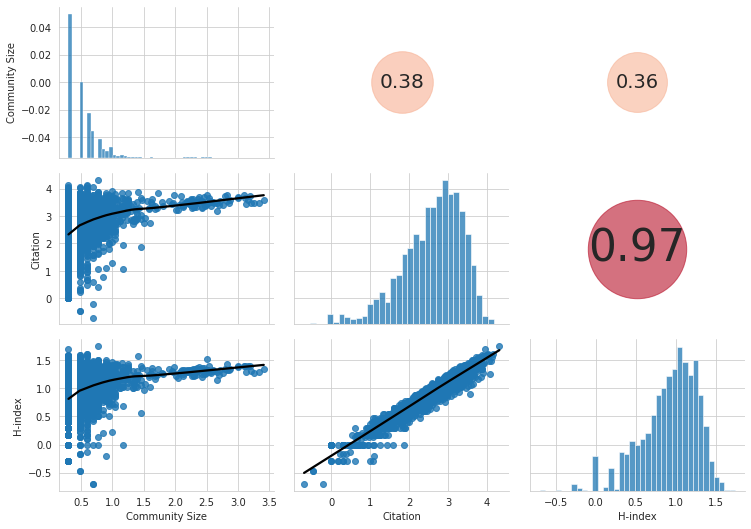

In [ ]:
#Correlation calculation and plot
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}"
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

h = sns.PairGrid(all_df_log, aspect=1.4, diag_sharey=False, dropna=True)
h.map_lower(sns.regplot, lowess=True, line_kws={'color': 'black'})
h.map_diag(sns.histplot)
h.map_upper(corrdot)

###Assortativity Coefficient for different attributes

In [ ]:
#Assortavity by Attributes

print("field:", nx.attribute_assortativity_coefficient(g, "field"))
print("h-index:", nx.attribute_assortativity_coefficient(g, "h-index"))
print("citation_number:", nx.attribute_assortativity_coefficient(g, "citation_number"))
print("node_degree:", nx.attribute_assortativity_coefficient(g, "node_degree"))

field: 0.41694338227208244
h-index: 0.014068854506713128
citation_number: 0.004566700977898398
node_degree: -0.11994638722759103


###Structural metrics

#### Largest connected component of the network

In [ ]:
#Largest weakly connected component
largest_wcc = max(nx.connected_components(g), key=len)

In [ ]:
#Subgraph of the largest weakly connected component
max_wcc = nx.subgraph(g, largest_wcc)

In [ ]:
print("Largest WCC Nodes :" , max_wcc.number_of_nodes())

Largest WCC Nodes : 35880


#####Average clustering coefficient of a network
-measures the degree to which
nodes intend to cluster together

In [ ]:
#Clustering coefficient of the weakly connected component of the network subgraph
nx.average_clustering(max_wcc, weight=None, count_zeros=True)

0.038307458076561135

##### Average shortest path length

In [ ]:
#List of path lengths from a node source
shortest_path_length = dict(nx.shortest_path_length(g, source=455))

In [ ]:
#Average of the path lenghts from the node source=455
avg_of_values = sum(shortest_path_length.values()) / len(shortest_path_length.values())
print('Average of values: ', avg_of_values)

Average of values:  6.833807134894092


##Centrality Metrics


In [ ]:
#Computing Degree centrality (Normalized)
#The degree centrality for a node v is the fraction of nodes it is connected to.
degCent = nx.degree_centrality(g)

#Top 10 nodes in Descending order sorting centrality
degCent_top=(sorted(degCent.items(), key=lambda item: item[1], reverse=True)[0:5])
degCent_top

[(455, 0.0035329368096238987),
 (5544, 0.003197531416305174),
 (7646, 0.003152810697196011),
 (6739, 0.003018648539868521),
 (7356, 0.0029292071016501944)]

In [ ]:
#Computing PageRank
pagerank = nx.pagerank(g)
pagerank_top=(sorted(pagerank.items(), key=lambda item: item[1], reverse=True)[0:5])
pagerank_top

[(7646, 0.0011622650259067082),
 (5544, 0.0010678487454972578),
 (3981, 0.0009297620746102099),
 (5823, 0.0008630724075209295),
 (7139, 0.0008534766722295919)]

In [ ]:
#Computing Eigenvector
eigenvector = nx.eigenvector_centrality(g)
eigenvector_top=(sorted(eigenvector.items(), key=lambda item:item[1], reverse=True)[0:5])
eigenvector_top

[(455, 0.38055111395254504),
 (6739, 0.365109942793446),
 (7641, 0.35942807672560567),
 (242, 0.3569254431560192),
 (172628, 0.06337631074729433)]

##Subgraph - Centrality Metrics
Calculations for subgraph used for visualization (g_chen)

In [ ]:
#Computing betweenness
betCent = nx.betweenness_centrality(g_chen)

#Descending order sorting betweeness
betCent_top=(sorted(betCent.items(), key=lambda item: item[1], reverse=True)[0:5])
betCent_top

[(1, 0.0), (121510, 0.0), (2, 0.0), (16334, 0.0), (130848, 0.0)]

In [ ]:
#Computing Closeness
closeness = nx.closeness_centrality(g_chen)
closeness_top=(sorted(closeness.items(), key=lambda item: item[1], reverse=True)[0:5])
closeness_top

[(121510, 0.00303951367781155),
 (16334, 0.00303951367781155),
 (130848, 0.00303951367781155),
 (171681, 0.00303951367781155),
 (295877, 0.00303951367781155)]